# One-dimensional Ising chain with nv near neighbor interactions 

In [3]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [4]:
# main module
from ising import ising

# math 
import numpy as np
import scipy
from scipy.sparse import csr_matrix, coo_matrix
from scipy.linalg import eig as get_eigs
from scipy.interpolate import interp1d
import math

# plots
import style
import matplotlib.pyplot as plt
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

In [60]:
Tem_ini = 1E-2
Tem_end = 0.2
Tem_step = 1E-2
magField_ini = 1E-10
magField_end = 1E-11
magField_num_step = 50
magField_step = (magField_end-magField_ini)/magField_num_step
num_particles = 20
nv = 1
p = 1.5 # exponent of interactions 1/J^p
listJ = 1/np.arange(1,nv+1,1)**p

C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\src\ising\ising.py:150: ComplexWarning: Casting complex values to real discards the imaginary part
  free_energy = -Tem*math.log(max_eigenvalue)
C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


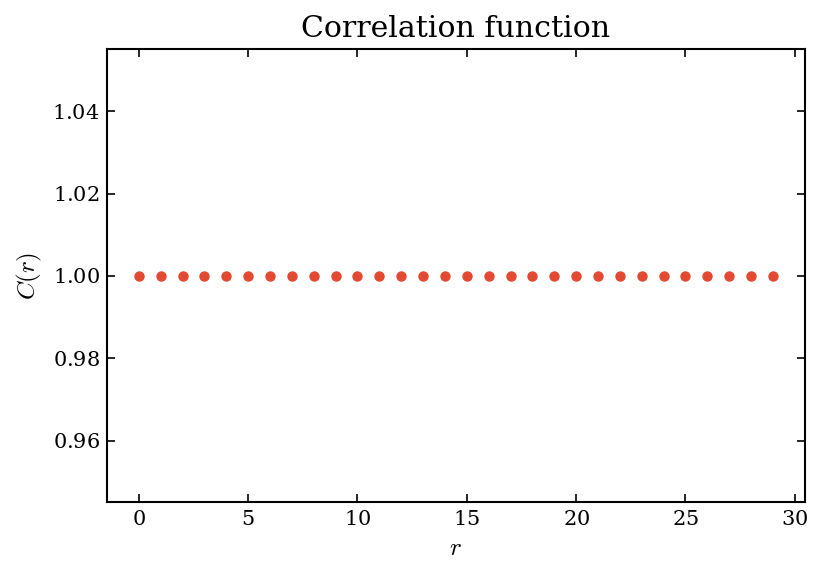

In [80]:
data = []
cor_functs = []
for temp in np.arange(Tem_ini,Tem_end,Tem_step):
    for mag in np.arange(magField_ini,magField_end,magField_step):
        trans_m = ising.transfer_matrix(mag,temp,nv,listJ)
        eigenvalues, eigenvectors = get_eigs(trans_m.toarray())
        eigenvectors = np.transpose(eigenvectors)
#         free_energy, correction_en = ising.n_free_helmholtz_energy(eigenvalues,temp,num_particles)
        max_eigenval = max(eigenvalues)
        max_eigenvec = eigenvectors[eigenvalues.argmax()]
        free_energy_tl = ising.free_helmholtz_energy_tl(max_eigenval,temp)
        magnetization = ising.magnetization_avg_tl(max_eigenvec,2**nv)
        x_cor_function = np.arange(0,30,1)
        y_cor_function = []
        for r in x_cor_function:
            y_cor_function.append(ising.correlation_function(eigenvectors,eigenvalues,r))
        cor_functs.append(interp1d(x_cor_function,y_cor_function))
        plt.plot(x_cor_function,y_cor_function,'o')
        pyplot.title('Correlation function')
        pyplot.xlabel('$r$')
        pyplot.ylabel('$C(r)$')
        pyplot.show()
        data.append([temp,mag,free_energy_tl,magnetization])
        break
    break

In [133]:
def get_exp_funct(B:float,A:float):
    return lambda x: np.exp(A)*np.exp(B*x)

y=exp(B)*e^(A*x) [-0.01433144+0.j -1.22458965+0.j]


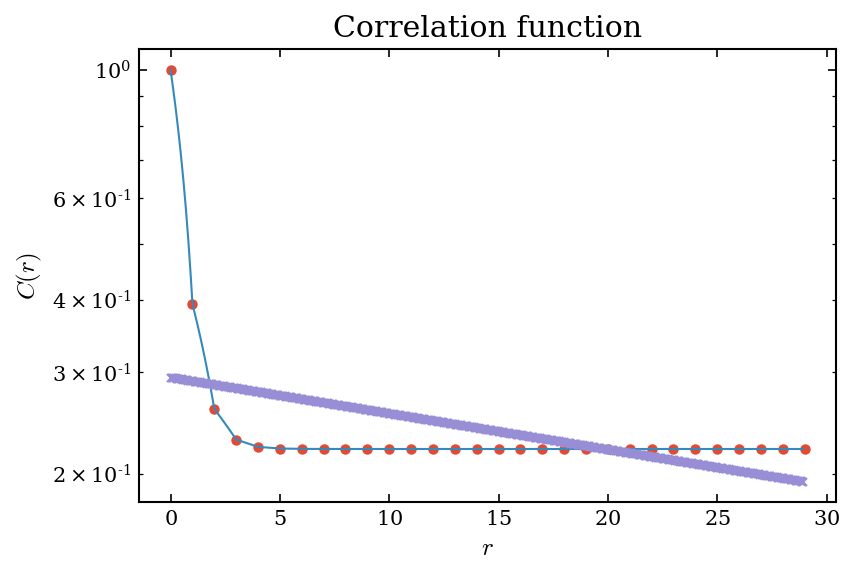

In [134]:
temp = 4
mag = 1
trans_m = ising.transfer_matrix(mag,temp,nv,listJ)
eigenvalues, eigenvectors = get_eigs(trans_m.toarray())
eigenvectors = np.transpose(eigenvectors)
#         free_energy, correction_en = ising.n_free_helmholtz_energy(eigenvalues,temp,num_particles)
max_eigenval = max(eigenvalues)
max_eigenvec = eigenvectors[eigenvalues.argmax()]
free_energy_tl = ising.free_helmholtz_energy_tl(max_eigenval,temp)
magnetization = ising.magnetization_avg_tl(max_eigenvec,2**nv)
x_cor_function = np.arange(0,30,1)
y_cor_function = []
for r in x_cor_function:
    y_cor_function.append(ising.correlation_function(eigenvectors,eigenvalues,r))
cor_inter = interp1d(x_cor_function,y_cor_function)
xnew = np.linspace(0, 29, num=500, endpoint=False)
exp_fit_val=np.polyfit(x_cor_function, np.log(y_cor_function),1)
print('y=exp(B)*e^(A*x)',exp_fit_val)
exp_funct = get_exp_funct(exp_fit_val[0].real,exp_fit_val[1].real)
plt.semilogy(x_cor_function,y_cor_function,'o',
             xnew,cor_inter(xnew),'-',
             xnew,exp_funct(xnew),'x')
pyplot.title('Correlation function')
pyplot.xlabel('$r$')
pyplot.ylabel('$C(r)$')
pyplot.show()
data.append([temp,mag,free_energy_tl,magnetization])

In [ ]:
for temp in 

In [62]:
import pandas as pd
df = pd.DataFrame(data,columns=["temp",'mag','free_energy','magnetization_avg'])

In [63]:
df.head()

,temp,mag,free_energy,magnetization_avg
0,0.01,1.000000e-10,-1.0,1.0
1,0.01,9.820000e-11,-1.0,1.0
2,0.01,9.640000e-11,-1.0,1.0
3,0.01,9.460000e-11,-1.0,1.0
4,0.01,9.280000e-11,-1.0,1.0


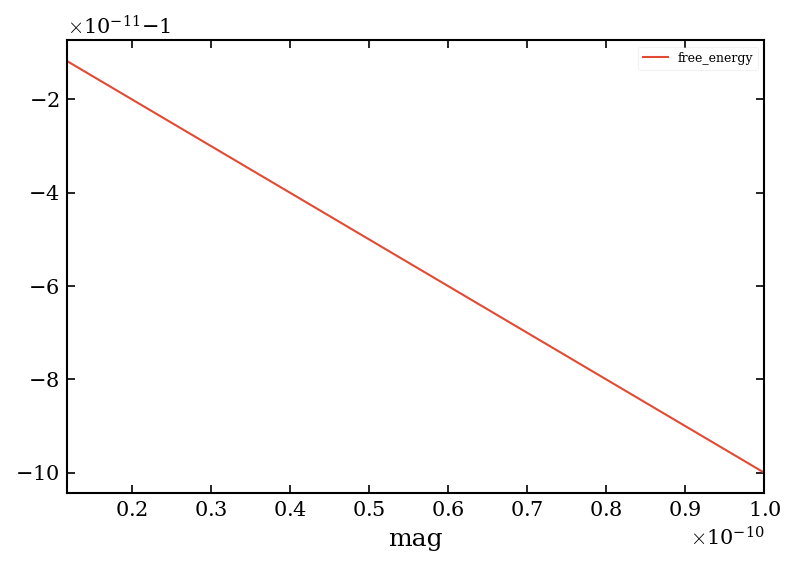

In [75]:
df_free_energy = df.loc[df['temp'] == df.iloc[0]['temp']]
df_free_energy.plot(x='mag',y='free_energy')

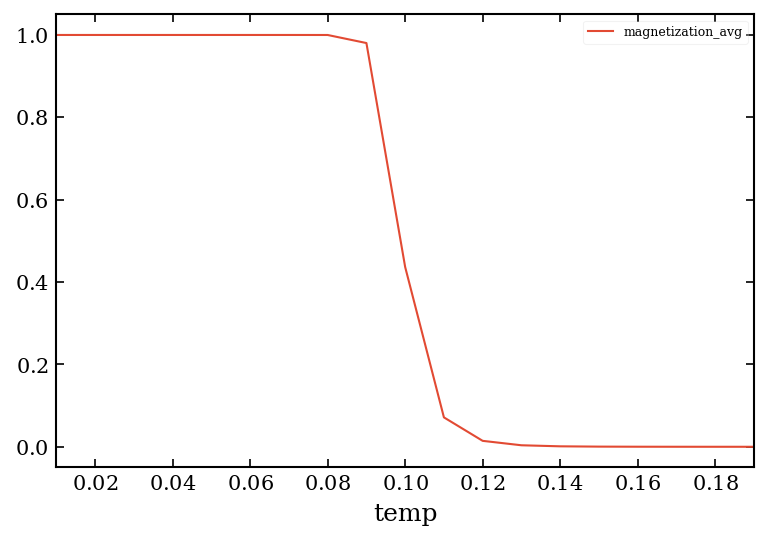

In [76]:
df_free_energy = df.loc[df['mag'] == df.iloc[0]['mag']]
df_free_energy.plot(x='temp',y='magnetization_avg')

In [70]:
from scipy.interpolate import interp1d
x = df_free_energy['temp'].values
y = df_free_energy['magnetization_avg'].values
free_energy_interpolate = interp1d(x,y)

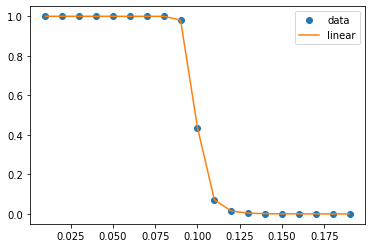

In [73]:
xnew = np.linspace(Tem_ini, Tem_end-Tem_step, num=500, endpoint=False)
plt.plot(x,y,'o',xnew,free_energy_interpolate(xnew), '-' )
plt.legend(['data','linear'], loc='best')
plt.show()

In [10]:
1/np.arange(1,15,1)**1.9

array([1.        , 0.26794337, 0.12401369, 0.07179365, 0.04698476,
       0.03322864, 0.02479212, 0.01923663, 0.01537939, 0.01258925,
       0.01050398, 0.00890339, 0.00764729, 0.00664288])